## Intro 

In this notebook, we will get a little practice with [NumPy](https://numpy.org/) and [Pandas](https://pandas.pydata.org/), and start building better intuitions about the geometry of data. We'll also get some practice with vector notation. Once we've 

Remember that machine learning methods often start but turning data into points in space. One reason to do this is that we can use tools from geometry to reason about data. This is pretty cool! We are going to use abstract concepts from math to reason about practical data from the grubby real world.  

In this notebook, we're going to try this out with one mathematical concept: distance. You already have intuitions about distance. Boulder is closer to Denver than it is to California, but California is closer to Boulder than New York. We are going to learn to formalize that intuition using math. We are not just going to do that for the sake of math. Formalizing distance like this will help us use distance reason about distance in datasets using computers, allowing us to ask new questions about large datasets in high dimensions.

Eventually, we'll get to our first machine learning methods: K-nearest neighbors and k-means clustering. But first we need to learn a bit more. 

[1] My own personal preference is just to use numpy for everything, but lots of people like pandas and use it all the time. You will develop your own software tastes in this class. 

In [14]:
'''
In this cell, go ahead and import the data from covid.csv, which is available on Canvas. 

If you have not installed pandas, you will need to that. (I strongly suggest using conda). 

If pandas is totally new to you, I suggest doing a quick tutorial to get up to speed. 
We'll use pandas a little bit in this class
'''

import pandas as pd

df = pd.read_csv("covid.csv")

In [2]:
# print out the dataframe 

# 1. How many features are there?

# 2. How many observations are there? 

# [Type your answer here]

df

,state/region,population,num_positive,governor_party
0,AL,4833722,108433,republican
1,AK,735132,5060,republican
2,AZ,6626624,193537,republican
3,AR,2959373,52665,republican
4,CA,38332521,621562,democrat
5,CO,5268367,52838,democrat
6,CT,3596080,50897,democrat
7,DE,925749,16451,democrat
8,FL,19552860,573416,republican
9,GA,9992167,237030,republican


In [7]:
# This line of code converts a dataframe to a numpy matrix
# You might need to check out a tutorial of numpy is this is unfamiliar.

df_as_matrix = df.to_numpy()

print(type(df_as_matrix))  
# This prints out the matrix as a numpy array. 
# Numpy is a python library for manipulating vectors and matrixes, and doing linear algebra. 
# The code is optimized to run quickly. It is often used in ML. 
# https://numpy.org

# 3. What is the "dimensionality" of this matrix (and this dataset)? 
# The "dimensionality" of a matrix is the number of rows and columns in the matrix
# hint: https://numpy.org/devdocs/reference/generated/numpy.shape.html

# https://numpy.org/devdocs/reference/generated/numpy.shape.html

# [Type your answer here]
df_as_matrix.shape, 

<class 'numpy.ndarray'>


((52, 4),)

Now let's go ahead and plot states by population. Remember that population is just one dimension in the dataset. We're starting with population because it's *way* easier to think in one dimension than in say seven dimensions. However, as this class goes on, you *will* learn to think in 7 or even 300 dimensions!

### Plotting states by population

In [6]:
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/15943945/annotate-scatterplot-from-a-pandas-dataframe

def plotdf1D(df_):
    '''
    YOU DONT NEED TO MODIFY THIS FUNCTION 

    This function makes a 1D scatter plot of the data, along the population dimension
    '''
    
    plt.clf()
    
    df_ = df_.copy()
    df_["_"] = 0

    plt.scatter(df_['population'],df_["_"])
    
    plt.ylim(-.01, .01)
    
    plt.xlabel("Population (Millions)")
    
    # zip joins x and y coordinates in pairs
    for x,y,z in zip(df_["population"], df_["_"], df_["state/region"]):

        plt.yticks(color='w')

        plt.annotate(z, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
    plt.show()

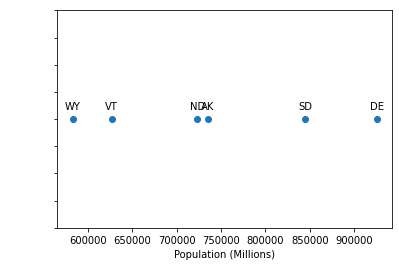

In [7]:
# Filter your dataframe to states with fewer than 1M people
# hint: this requires filtering the dataframe with pandas

less_than_1M = df[df['population'] < 1000000] # this variable should be a dataframe of states with fewer than 1M people

# and plot it

plotdf1D(less_than_1M)

## Just eyeballing the plot, which state is closest to Vermont along the population dimension?

[Type your answer here]

In [17]:
# Now lets represent each state as a 1D vector, with one dimension, for population

population_vectors = df["population"].to_numpy()

# What is the dimensionality of "population_vectors"? 

# [answer here]

# What do the rows represent in this matrix? 

# [answer here]

# What do the columns represent in this matrix? 

# [answer here]

array([ 4833722,   735132,  6626624,  2959373, 38332521,  5268367,
        3596080,   925749, 19552860,  9992167,  1404054,  1612136,
       12882135,  6570902,  3090416,  2893957,  4395295,  4625470,
        1328302,  5928814,  6692824,  9895622,  5420380,  2991207,
        6044171,  1015165,  1868516,  2790136,  1323459,  8899339,
        2085287, 19651127,  9848060,   723393, 11570808,  3850568,
        3930065, 12773801,  1051511,  4774839,   844877,  6495978,
       26448193,  2900872,   626630,  8260405,  6971406,  1854304,
        5742713,   582658])

The [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) is the distance of a straight line between two points in space. Let $\vec{p}$ be a vector and $\vec{q}$ be a vector. (Remember we show vectors with arrows over them.) The Euclidean distance from p to q, or from q to p is:

$d(\vec{p}, \vec{q}) = \sqrt(\vec{p}_1 - \vec{q}_1)$

In [ ]:
# Extra credit: write a Euclidean distance function